# Lab 2: Some Deep Learning Basics from Scratch


In [153]:
## Basic libraries needed:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some PyTorch stuff:
import torch
import torch.nn as nn


## Linear Regression/Gradient Descent from Scratch

**The goal here is for you to implement a version of gradient descent for simple linear regression yourself. Your methods need not be fancy, just functional.**

### Setup:

First consider the minimal linear regression

$$
\hat{y} = b + w_1 x_1,
$$

where $x_1$ is our only input feature, $w_1$ is the weight, and $b$ is the bias. To simplify our mathematical expressions, we can rewrite this as

$$
\hat{y} = \theta_0 x_0 + \theta_1 x_1
$$

where $x_0 = 1$, $\theta_0 = b$, and $\theta_1 = w_1$.

Let's make our error (or cost) function the mean square error (MSE):

$$
E = \frac{1}{n} \sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right)^2,
$$

or

$$
E = \frac{1}{n} \sum_{i=1}^n \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right)^2,
$$
where $n$ is the number of observations in the training dataset.

We need our gradient vector to run the gradient descend method. So, taking partial derivatives, we get

$$
\frac{\partial E}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^n \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right),
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^n \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right) x_1^{(i)},
$$

We can re-write these as

$$
\frac{\partial E}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right),
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right) x_1^{(i)},
$$

These expressions give us the change in the loss function with respect to either model parameter. To run gradient descent and iteratively update our estimates for $\theta_0$ and $\theta_1$, we simply use the following rule:

$$
\theta_{j}^{(\text{next})} = \theta_{j} - \eta \frac{\partial E (\theta_j)}{\partial \theta_j},
$$
where $\eta$ is our learning rate.


### Synthetic Data

Run the following cell to generate input ($x$) and output ($y$) data:

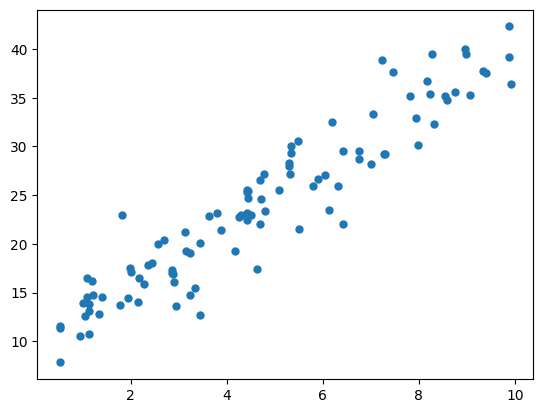

In [154]:
N = 100

#Random points between 0 and 10, sorted:
x = np.random.uniform(0, 10, N)
x.sort()

#Linear equation:
y = 3*x + 10 + np.random.normal(loc=0, scale=3, size=N)

#Plot our data:
plt.plot(x, y, 'o', markersize=5);

### Please implement the following:

Train a regression model on the given $x$ and $y$ in two ways:

1. (Full) batch gradient descent for linear regression with a single feature: Run the training loop for 100 iterations.
2. Stochastic gradient descent for linear regression with a single feature: Each training loop, sample a single observation. Run 1000 training loops.

- In either case, use a fixed learning rate of $\eta = .01$, and use an initial guess of $\theta_0 = \theta_1 = 1$.

- Plot the evolution of the weight and bias, as below. Also, plot your model predictions against the training data, as also shown below:

Note that your stochastic gradient plots will vary slightly due to random chance.

**For this task, do not use any Scikit-Learn estimators or PyTorch functions!**

In [155]:
## Fill in
def gradient_descent(features, targets, lr = .01, iterations=1000):
    if features.ndim == 1:
        features = features.reshape(-1, 1)
    n = features.shape[0]
    x = np.hstack((np.ones((n, 1)), features))
    d = x.shape[1]
    theta = np.ones(d)
    theta_hist = [theta.copy()]
    for i in range(iterations):
        pred = x.dot(theta)
        loss = pred-targets
        grad_theta = 2/n*x.T.dot(loss)
        theta -= grad_theta*lr
        theta_hist.append(theta.copy())
    return theta, theta_hist

def stochastic_gradient_descent(features, targets, theta0=1, theta1=1, lr = .01, iterations=1000):
    if features.ndim == 1:
        features = features.reshape(-1, 1)
    n = features.shape[0]
    x = np.hstack((np.ones((n, 1)), features))
    d = x.shape[1]
    theta = np.ones(d)
    theta_hist = [theta.copy()]
    for i in range(iterations):
        idx = np.random.randint(n)
        x_i = x[idx]
        y_i = targets[idx]
        pred = x_i.dot(theta)
        loss = pred-y_i
        grad_theta = 2*loss*x_i
        theta -= grad_theta*lr
        theta_hist.append(theta.copy())
    return theta, theta_hist

In [156]:
theta, theta_hist = gradient_descent(x, y)
theta_sgd, theta_hist_sgd = stochastic_gradient_descent(x, y)

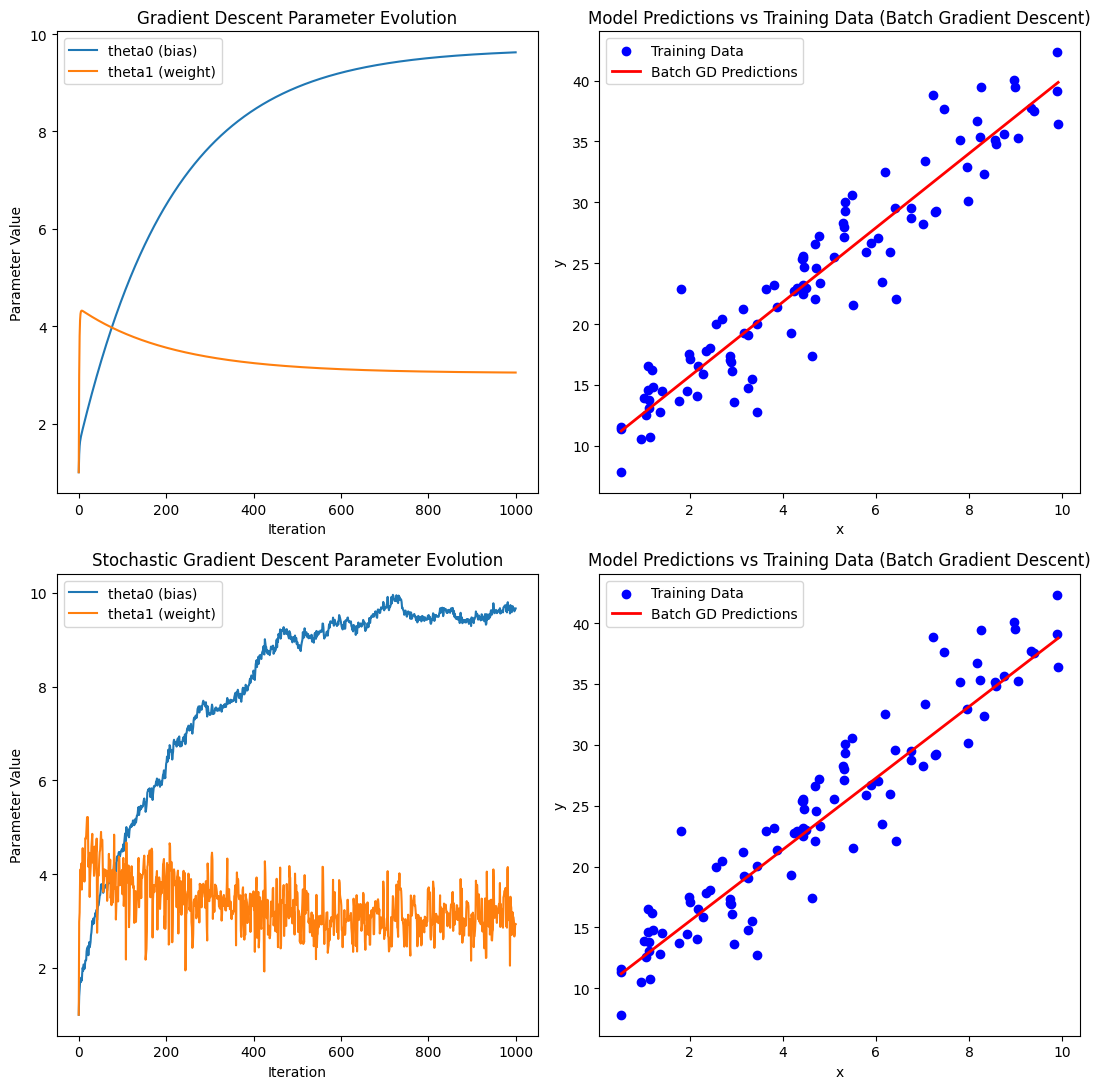

In [157]:
theta_hist_array = np.array(theta_hist)  
theta0_hist = theta_hist_array[:, 0]  
theta1_hist = theta_hist_array[:, 1]

plt.figure(figsize=(11, 11))
plt.subplot(2, 2, 1)
plt.plot(theta0_hist, label="theta0 (bias)")
plt.plot(theta1_hist, label="theta1 (weight)")
plt.title("Gradient Descent Parameter Evolution")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

theta_final = theta_hist[-1]
predictions = theta_final[0] + theta_final[1] * x

plt.subplot(2, 2, 2)
plt.scatter(x, y, label='Training Data', color='blue')
plt.plot(x, predictions, 'r-', linewidth=2, label='Batch GD Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs Training Data (Batch Gradient Descent)')
plt.legend()

theta_hist_sgd_array = np.array(theta_hist_sgd)
theta0_hist_sgd = theta_hist_sgd_array[:, 0]
theta1_hist_sgd = theta_hist_sgd_array[:, 1]

plt.subplot(2, 2, 3)
plt.plot(theta0_hist_sgd, label="theta0 (bias)")
plt.plot(theta1_hist_sgd, label="theta1 (weight)")
plt.title("Stochastic Gradient Descent Parameter Evolution")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

theta_sgd_final = theta_hist_sgd[-1]
predictions = theta_sgd_final[0] + theta_sgd_final[1] * x

plt.subplot(2, 2, 4)
plt.scatter(x, y, label='Training Data', color='blue')
plt.plot(x, predictions, 'r-', linewidth=2, label='Batch GD Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs Training Data (Batch Gradient Descent)')
plt.legend()

plt.tight_layout()
plt.show()

### Add Momentum + Nesterov Trick

Recall the basic momentum algorithm, in vector form:

$$
\mathbf{m} \leftarrow \beta \mathbf{m} - \eta \nabla E(\theta),
$$
$$
\theta \leftarrow \theta + \mathbf{m},
$$
where $\mathbf{m}$ is the momentum vector, and $\theta$ is our vector of model parameters.

Also recall that we can speed up the momentum algorithm by adding the Nesterov Trick: Update the momentum using not the gradient where you are, but where you will be! Mathematically:
$$
\mathbf{m} \leftarrow \beta \mathbf{m} - \eta \nabla E(\theta + \beta \mathbf{m}),
$$
$$
\theta \leftarrow \theta + \mathbf{m},
$$

**Extend your work above to implement momentum with the Nesterov Trick**

- Run (full) batch gradient descent with momentum for the same regression problem, with and without the Nesterov trick.

- You should observe that some momentum (e.g., $\beta = 0.9$) results in much faster convergence to the minimum. Using the Nesterov trick smoothes and may hasten this convergence.

- Plot the evolution of the weight and bias over 1,000 iterations of the method using a fixed learning rate of $\eta = .01$, an initial guess of $\theta_0 = \theta_1 = 1$, and an *exaggerated* momentum of $\beta = 0.99$. Plot this evolution with and without the Nesterov trick. Your results should resemble those below:

**For this task, do not use any Scikit-Learn estimators or PyTorch functions!**

In [158]:
## Fill in
def gradient_descent_momentum(features, targets, theta0=1, theta1=1, beta=0.99, lr=0.01, iterations=1000):
    if features.ndim == 1:
        features = features.reshape(-1, 1)
    n = features.shape[0]
    x = np.hstack((np.ones((n, 1)), features))
    d = x.shape[1]
    y = targets
    theta = np.ones(d)
    theta_hist = [theta.copy()]
    momentum = np.zeros(d)
    
    for i in range(iterations):
        pred = x.dot(theta)
        loss = pred-targets
        grad_theta = 2/n*x.T.dot(loss)
        momentum = beta*momentum - grad_theta*lr
        theta = theta+momentum
        theta_hist.append(theta.copy())
    return theta, theta_hist

def gradient_descent_momentum_nesterov(features, targets, theta0=1, theta1=1, beta=0.99, lr=0.01, iterations=1000):
    if features.ndim == 1:
        features = features.reshape(-1, 1)
    n = features.shape[0]
    x = np.hstack((np.ones((n, 1)), features))
    d = x.shape[1]
    y = targets
    theta = np.ones(d)
    theta_hist = [theta.copy()]
    momentum = np.zeros(d)
    
    for i in range(iterations):
        theta_t = theta + beta*momentum
        pred = x.dot(theta_t)
        loss = pred-targets
        grad_theta = 2/n*x.T.dot(loss)
        momentum = beta*momentum - grad_theta*lr
        theta = theta+momentum
        theta_hist.append(theta.copy())
    return theta, theta_hist

In [159]:
theta_momentum, theta_momentum_hist = gradient_descent_momentum(x, y)
theta_momentum_nesterov, theta_momentum_nesterov_hist = gradient_descent_momentum_nesterov(x, y)

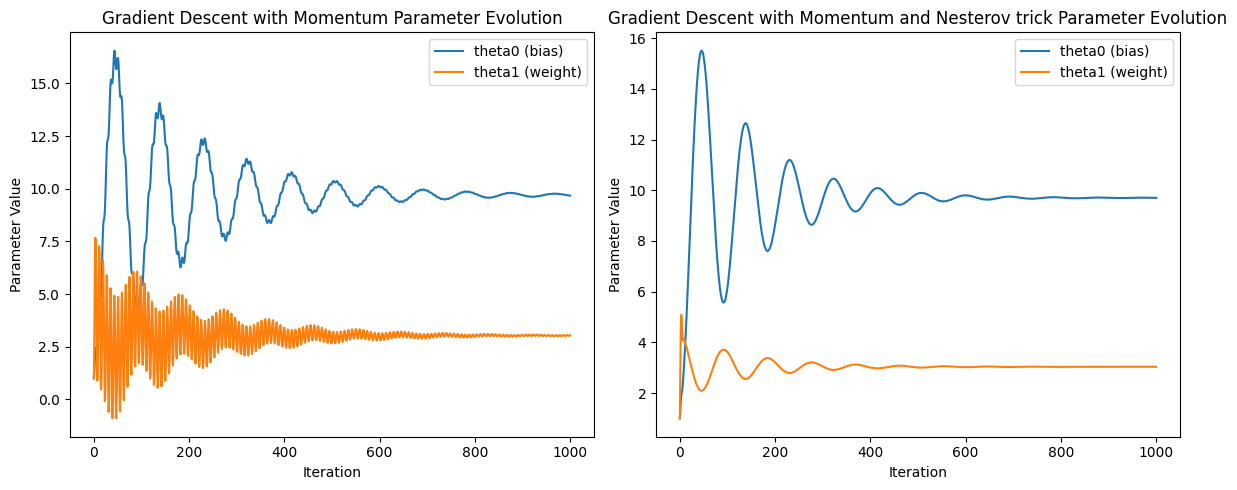

In [160]:
theta_momentum_hist_array = np.array(theta_momentum_hist)  
theta0_hist = theta_momentum_hist_array[:, 0]  
theta1_hist = theta_momentum_hist_array[:, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0_hist, label="theta0 (bias)")
plt.plot(theta1_hist, label="theta1 (weight)")
plt.title("Gradient Descent with Momentum Parameter Evolution")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

theta_momentum_nesterov_hist_array = np.array(theta_momentum_nesterov_hist)
theta0_hist_nesterov = theta_momentum_nesterov_hist_array[:, 0]
theta1_hist_nesterov = theta_momentum_nesterov_hist_array[:, 1]

plt.subplot(1, 2, 2)
plt.plot(theta0_hist_nesterov, label="theta0 (bias)")
plt.plot(theta1_hist_nesterov, label="theta1 (weight)")
plt.title("Gradient Descent with Momentum and Nesterov trick Parameter Evolution")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

plt.tight_layout()
plt.show()

## Implement Logistic Regression "Directly" Using PyTorch AutoGrad + Optimizer

- Let's generate some synthetic data using a logistic regression model
- And then fit a logistic regression model using PyTorch AutoGrad, BCECrossEntropy Loss Function, and SGD Optimizer. Do not use `nn.Linear` or `nn.Module` for this task.

Run the following cells to generate our synthetic data as PyTorch tensors:

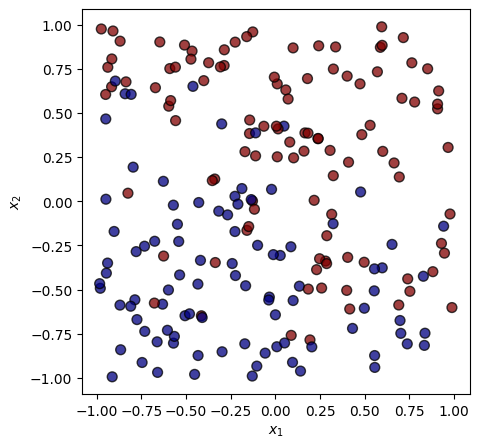

In [161]:
#Some synthetic data
N = 200

#Two random features:
np.random.seed(2)
x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-1, 1, N)

#Underlying logit:
y_logit = 2*x1 + 4*x2 + .5

#Probability of being in particular class:
p = 1 / (1 + np.exp(-y_logit))

#Randomly determine class based on probabilities:
rand = np.random.uniform(0,1,N)
y = (rand < p).astype(np.float32)



#Plot our data:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5)) #, dpi=300)

ax1.scatter(x1, x2, c=y, s=50, cmap='jet', edgecolor='black', alpha=.75)#, label=['a','b']);

ax1.set_xlabel('$x_1$', fontweight='bold')
ax1.set_ylabel('$x_2$', fontweight='bold');
#ax1.legend()

In [162]:
## Convert to PyTorch tensors:
x1 = torch.tensor(x1, dtype=torch.float32).unsqueeze(dim=1)
x2 = torch.tensor(x2, dtype=torch.float32).unsqueeze(dim=1)

y = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1)

In [163]:
## Input as matrix tensor:
X = torch.hstack((x1,x2))


In [164]:
w = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

optimizer = torch.optim.SGD([w, b], lr=0.1)
loss_fn = nn.BCEWithLogitsLoss()

epochs=1000

In [165]:
for epoch in range(epochs):
    optimizer.zero_grad()
    logits = X@w+b
    loss = loss_fn(logits, y)
    loss.backward()
    optimizer.step()

In [166]:
with torch.no_grad():
    prob = torch.sigmoid(X@w + b)
    predictions = (prob >= 0.5).float()

print("Weights:", w.detach().numpy())
print("Final bias:", b.detach().numpy())

accuracy = (predictions.eq(y).sum().item() / y.shape[0]) * 100
print(f"Accuracy: {accuracy:.2f}%")

Weights: [[1.8195208]
 [3.1481054]]
Final bias: [0.41885087]
Accuracy: 81.50%


In [167]:
x1_min, x1_max = x1.min() - 0.1, x1.max() + 0.1
x2_min, x2_max = x2.min() - 0.1, x2.max() + 0.1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()] 

grid_tensor = torch.tensor(grid, dtype=torch.float32)

with torch.no_grad():
    logits_grid = grid_tensor@w + b
    probs_grid = torch.sigmoid(logits_grid)

Z = probs_grid.reshape(xx.shape).detach().numpy()

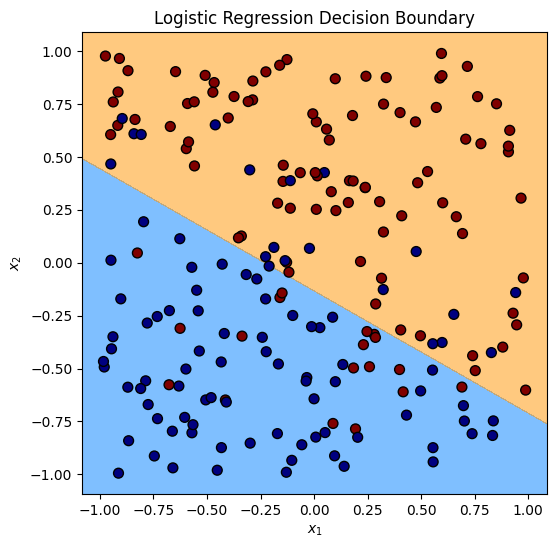

In [169]:
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.5, cmap='jet')
plt.scatter(x1, x2, c=y, s=50, edgecolors='black', cmap='jet')
plt.xlabel('$x_1$', fontweight='bold')
plt.ylabel('$x_2$', fontweight='bold')
plt.title("Logistic Regression Decision Boundary")
plt.show()

In [116]:
## Fill in implementation
#def log_reg(x, y, lr=0.1, epochs=1000):
#    if x.ndim == 1:
#        x = x.unsqueeze(1) 
#
#    n = x.shape[0]  
#    ones = torch.ones((n, 1), dtype=x.dtype, device=x.device)
#    x = torch.hstack((ones, x)) 
#    d = X.shape[1]
#    theta = torch.ones((d, 1), requires_grad=True) 
#    loss_fn = nn.BCEWithLogitLoss()
#    optimizer = optim.SGD([theta], lr=lr)
#
#    for epoch in range(epochs):
#        optimizer.zero_grad()
#        logits = x@theta
#        loss = loss_fn(logits, y)
#        loss.backward()
#        optimizer.step()
#
#    return theta

In [117]:
#theta_log_reg = log_reg(X, y)

### Setup Model

Now, create, as PyTorch tensors, an appropriate weight vector and bias, where initial weights are drawn from a standard normal distribution and the bias is set to $0$. Be sure you set `requires_grad = True` when you construct these tensors.

Write a function that predicts (logistic regression) model output (as class $1$ probability, not a binary), given these parameters and an input data matrix, $X$:

```
def run_model(w, b, X):
    ...
```

Note that `run_model` should apply a sigmoid activation function before returning the output.

In [170]:
w = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

def run_model(w, b, X):
    
    ## Fill in
    logits = X@w + b
    probs = torch.sigmoid(logits)
    return probs

w = torch.randn(2, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

probs = run_model(w, b, X)
print('Probabilities:', predicted_probs.detach().numpy())

Probabilities: [[0.48776978]
 [0.41187164]
 [0.6527216 ]
 [0.7313396 ]
 [0.52901924]
 [0.4361005 ]
 [0.26681888]
 [0.4281417 ]
 [0.29534256]
 [0.25525936]
 [0.3003158 ]
 [0.3435125 ]
 [0.62607515]
 [0.5828317 ]
 [0.59588414]
 [0.3610459 ]
 [0.4104067 ]
 [0.57819825]
 [0.5261459 ]
 [0.27884653]
 [0.33153194]
 [0.5763432 ]
 [0.36813104]
 [0.28204775]
 [0.667486  ]
 [0.71123135]
 [0.48474056]
 [0.5759139 ]
 [0.2673567 ]
 [0.36038673]
 [0.3836429 ]
 [0.31278852]
 [0.6129853 ]
 [0.6369328 ]
 [0.43448216]
 [0.5247466 ]
 [0.3292269 ]
 [0.43941757]
 [0.498692  ]
 [0.35294074]
 [0.6430741 ]
 [0.66391593]
 [0.42214888]
 [0.48602912]
 [0.63590574]
 [0.38706955]
 [0.2568025 ]
 [0.6764052 ]
 [0.35699016]
 [0.44360363]
 [0.69764787]
 [0.26504967]
 [0.49604225]
 [0.7400175 ]
 [0.46386454]
 [0.52203804]
 [0.6231995 ]
 [0.64036584]
 [0.73005307]
 [0.62006694]
 [0.4793494 ]
 [0.7205044 ]
 [0.4342215 ]
 [0.6464007 ]
 [0.6310258 ]
 [0.39316714]
 [0.28512734]
 [0.20562458]
 [0.5065829 ]
 [0.5011605 ]
 [0.7

### Run Training Loop

- Create an appropriate PyTorch loss function, as well as a `torch.optim.SGD` optimizer that uses a learning rate of `.005`, has `momentum = 0.95`, and argument `nesterov=True`. Pass the appropriate parameters to your optimizer at initialization.

#### 1. Full-Batch Gradient Descent

- Use a `for` loop to train the model parameters, using the entire data matrix `X` each iteration (i.e., implement full-batch gradient descent), for 2,000 training epochs.

- Plot the evolution of both weights, bias, and the loss as a function of training epoch.

#### 2. (True) Stochastic Gradient Descent

- Reset the model. Now, use a `for` loop to train the model parameters, but use only a single observation each iteration. Run this training loop for 2,000 iterations.

- Again, plot the evolution of the weights, bias, and the loss as a function of training epoch, as in the example below.

- Also, visualize the decision surface along with the training dataset as in the example figure below.

In [194]:
## Fill in
N, d = X.shape

def FBGD(X, y, epochs=2000):
    N, d = X.shape
    w = torch.randn(d, 1, requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = torch.optim.SGD([w, b], lr=.005, momentum=.95, nesterov=True) 
    loss_fn = nn.BCEWithLogitsLoss()
    w_hist = []
    b_hist = []
    loss_hist = []
    
    for epoch in range(epochs):
        optimizer.zero_grad()            
        logits = X @ w + b          
        loss = loss_fn(logits, y)  
        loss.backward()       
        optimizer.step() 
        
        w_hist.append(w.detach().clone())
        b_hist.append(b.detach().clone())
        loss_hist.append(loss.item())
        
        if (epoch + 1) % 200 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
            
    return w, b, w_hist, b_hist, loss_hist


def SGD(X, y, epochs=2000):
    N, d = X.shape
    w = torch.randn(d, 1, requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = torch.optim.SGD([w, b], lr=.005, momentum=.95, nesterov=True)
    loss_fn = nn.BCEWithLogitsLoss()
    w_hist = []
    b_hist = []
    loss_hist = []
    
    for i in range(epochs):
        idx = torch.randint(0, N, (1,)).item()
        x_i = X[idx:idx+1, :]  
        y_i = y[idx:idx+1, :] 
        
        optimizer.zero_grad()
        logits = x_i@w + b 
        loss = loss_fn(logits, y_i)
        loss.backward()
        optimizer.step()

        w_hist.append(w.detach().clone())
        b_hist.append(b.detach().clone())
        loss_hist.append(loss.item())
        
        if (i + 1) % 400 == 0:
            print(f"Epochs {i+1}/{epochs}, Loss: {loss.item():.4f}")
            
    return w, b, w_hist, b_hist, loss_hist

In [195]:
w_final_fb, b_final_fb, w_hist_fb, b_hist_fb, loss_hist_fb = FBGD(X, y, epochs=2000)
w_final_sg, b_final_sg, w_hist_sg, b_hist_sg, loss_hist_sg = SGD(X, y, epochs=2000)

Epoch 200/2000, Loss: 0.4385
Epoch 400/2000, Loss: 0.4128
Epoch 600/2000, Loss: 0.4054
Epoch 800/2000, Loss: 0.4026
Epoch 1000/2000, Loss: 0.4014
Epoch 1200/2000, Loss: 0.4009
Epoch 1400/2000, Loss: 0.4006
Epoch 1600/2000, Loss: 0.4004
Epoch 1800/2000, Loss: 0.4004
Epoch 2000/2000, Loss: 0.4003
Epochs 400/2000, Loss: 0.2319
Epochs 800/2000, Loss: 0.1831
Epochs 1200/2000, Loss: 0.0075
Epochs 1600/2000, Loss: 0.0917
Epochs 2000/2000, Loss: 1.1575


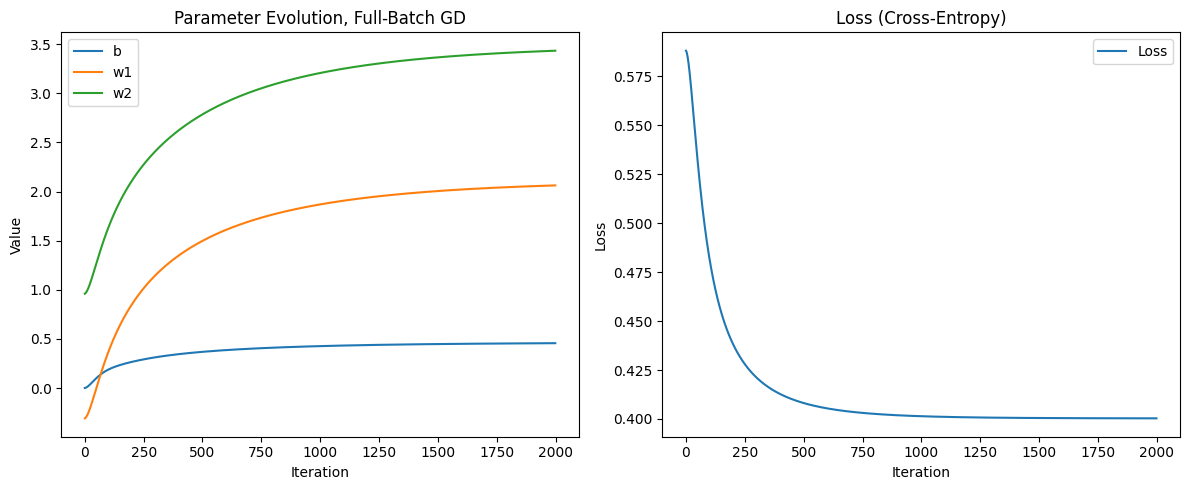

In [196]:
w_hist_fb_array = np.array([w_i[0].item() for w_i in w_hist_fb])
b_hist_fb_array = np.array([b_i.item() for b_i in b_hist_fb])
b_array = [b_i[0].item() for b_i in b_hist_fb]
w1_array = [w_i[0, 0].item() for w_i in w_hist_fb]
w2_array = [w_i[1, 0].item() for w_i in w_hist_fb]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(b_array, label='b')
plt.plot(w1_array, label='w1')
plt.plot(w2_array, label='w2')
plt.title("Parameter Evolution, Full-Batch GD")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

# Right subplot: loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_hist_fb, label='Loss')
plt.title("Loss (Cross-Entropy)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


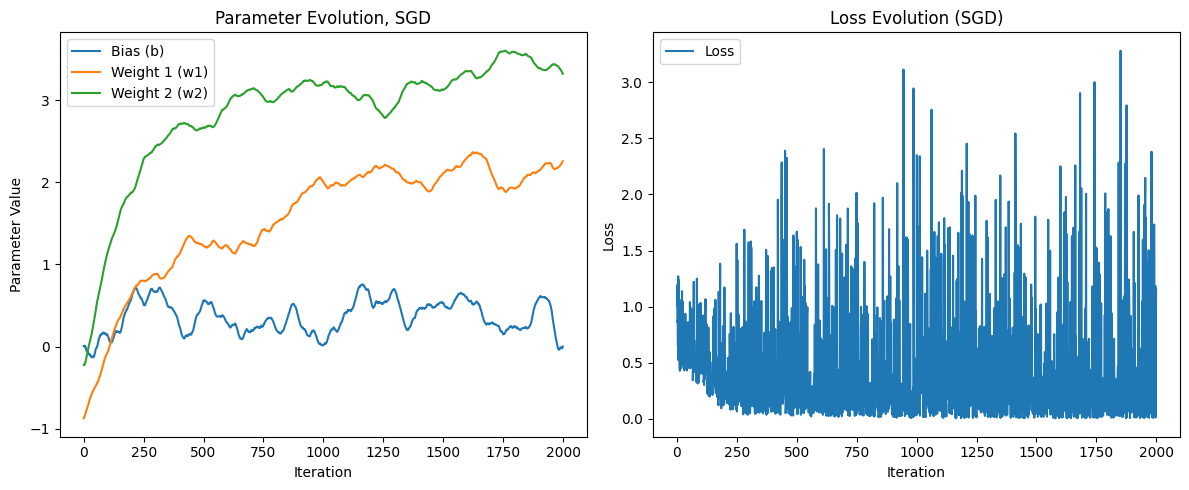

In [197]:

b_array_sgd = [b_i[0].item() for b_i in b_hist_sg]
w1_array_sgd = [w_i[0, 0].item() for w_i in w_hist_sg]
w2_array_sgd = [w_i[1, 0].item() for w_i in w_hist_sg]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(b_array_sgd, label='Bias (b)')
plt.plot(w1_array_sgd, label='Weight 1 (w1)')
plt.plot(w2_array_sgd, label='Weight 2 (w2)')
plt.title("Parameter Evolution, SGD")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_hist_sg, label='Loss')
plt.title("Loss Evolution (SGD)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [200]:
x1_min, x1_max = x1.min() - 0.1, x1.max() + 0.1
x2_min, x2_max = x2.min() - 0.1, x2.max() + 0.1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]

grid_tensor = torch.tensor(grid, dtype=torch.float32)
with torch.no_grad():
    logits_grid = grid_tensor @ w_final_sg + b_final_sg  
    probs_grid = torch.sigmoid(logits_grid)

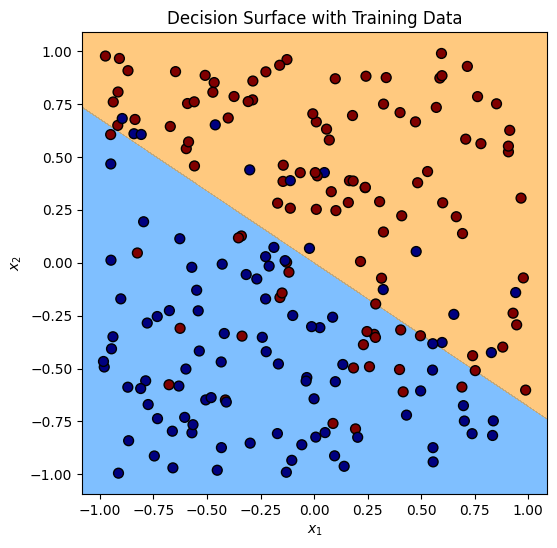

In [203]:
Z = probs_grid.reshape(xx.shape).detach().numpy()
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.5, cmap='jet')
plt.scatter(x1, x2, c=y, s=50, edgecolors='black', cmap='jet')
plt.xlabel('$x_1$', fontweight='bold')
plt.ylabel('$x_2$', fontweight='bold')
plt.title("Decision Surface with Training Data")
plt.show()